### Logistic regression

This method allows you to classify data as being in a category or not. The independent variable can be any numeric variable, but the independent variable must be 1 or 0 and it has a binomial distribution.

You wouldn't use this method to predict some kind of continuous variable (like size) or discrete numerical variable (like counting cars in a parking lot). It is used to predict categorical data.

Given a linear combination independent variables, we can estimate $ \hat p $

The link between the independent data and the dependent output is the logit function.

#### Logit function

This is the inverse of the standard logistic function, which is used in neural nets.

It has a domain of $ [0, 1] $ and range $ [-\infty, \infty] $

It is a logirithm (with the base larger than 1) of the odds.

In this case, we assume base $ e $:

$ \ln \left(\frac{p}{1-p}\right) = \ln(p) - \ln(1-p) $

The difference between two logit functions is:

$ logit(p_1) - logit(p_2) = \ln \left(\frac{p_1}{1-p_1}\right) - \ln \left(\frac{p_2}{1-p_2}\right) = \ln \left(\frac{p_1/(1-p_1)}{p_2/(1-p_2)}\right) $

The logit function has its only x-intercept at $ 0.5 $. Consider any event with equal odds. That is equivalent to $ \ln(1) = 0 $

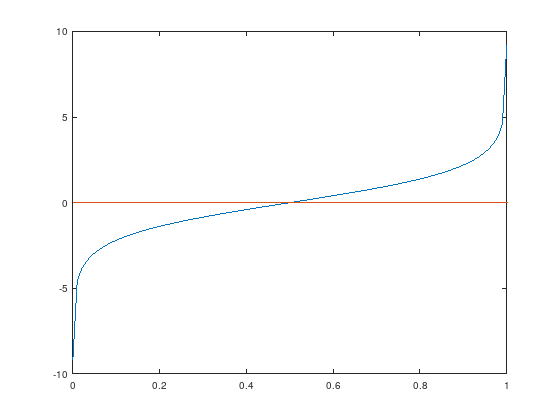

In [47]:
function y = logit(x)
    y = log(x./(1.-x));
end

# It's sensible not to include the range at the points where logit is undefined
lowerLimit = 0.0001;
upperLimit = 1 - lowerLimit;

X = linspace(lowerLimit,upperLimit);
plot(X, logit(X))
hold on
line([-0.05 1.05], [0 0])
xlim([0 1])

#### Logistic function

As said, this is the inverse of logit.

Since logit is defined in terms of $ p $ then we can find $ p $ with logit's inverse.

$ x = \ln\left(\frac{p}{1-p}\right) $

$ e^x = \left(\frac{p}{1-p}\right) $

$ 1 + e^x = \frac{1-p}{1-p}+ \frac{p}{1-p} $

$ 1 + e^x = \frac{1}{1-p} $

$ (1 + e^x)(1-p) = 1 $

$ 1-p = \frac{1}{1 + e^x} $

$ -p = \frac{1}{1 + e^x}-1 $

$ p = \frac{-1}{1 + e^x}+1 $

$ p = \frac{-1}{1 + e^x} + \frac{1 + e^x}{1 + e^x} $

$ p = \frac{e^x}{1 + e^x} $

In terms of logistic regression, we would have started this derivation with:

$ logit(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x $

$ \therefore logit^{-1}(p) =\large \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}} $

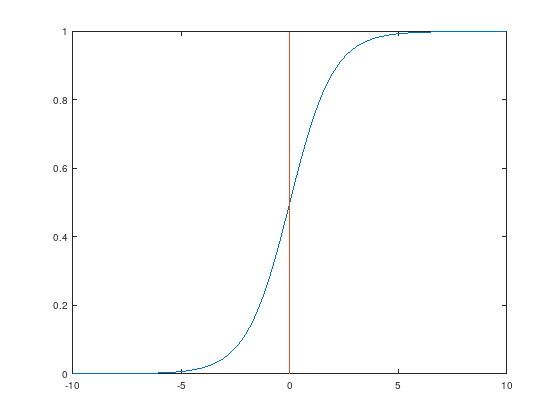

In [48]:
lowerLimit = -10;
upperLimit = 10;
X = linspace(lowerLimit,upperLimit);

function y = logistic(x)
    y = exp(x)./(1.+exp(x));
end

plot(X, logistic(X))
line([0 0], [0 1])

### Fitting the line

This video seems to do a good job of describing how to fit the logistic function to the data.

https://www.youtube.com/watch?v=BfKanl1aSG0

It would be a lot of work to implement the process, but here's the concept:

- Choose a linear model, $ y = x $ would be sufficient
- Project each of the data points onto the linear model, x-values remaining constant. This means that the y-values change.
- Transform the linear model with its data points into the logistic function (to find the probability for each data point).
- For this model, calculate the product of all probabilities. This is equivalent to adding the log of each probability. Call this the "Log Likelihood" for the line.
- Then repeat the process. Continue until the Log Likelihood is maximised to some acceptable level.

What's not mentioned in the video is how to choose the point around which the line rotates. Perhaps it's a similar situation to the above: keep the gradient constant and move the line sideways to maximise the Log Likelihood.